In [3]:
# !pip install pandas matplotlib numpy

In [1]:
import os
import re
from pathlib import Path

from plotter import *
from plotter.epochstats import EpochStats
from plotter.plotepochstats import PlotRangeQueryStats
from plotter.plotselectivities import PlotSelectivities, PlotSelectivitiesRangeQuery
from plotter.dataclass import SelectivityVsMetric, SelectivityVsRangeQueryMetric
from plotter.utils import vanilla_dirname, rqdc_dirname

PROJECT_DIR = Path.cwd().parent.parent

['Column Family Name: default, Size: 1561311877 bytes, Files Count: 429', 'Level Stats:', 'Level: 0, Files: 0, Size: 0 bytes', 'Level: 1, Files: 4, Size: 14701557 bytes', 'Level: 2, Files: 16, Size: 64525906 bytes', 'Level: 3, Files: 72, Size: 267002454 bytes', 'Level: 4, Files: 295, Size: 1066536927 bytes', 'Level: 5, Files: 42, Size: 148545033 bytes', 'Level: 6, Files: 0, Size: 0 bytes', 'Level: 7, Files: 0, Size: 0 bytes', 'Level: 8, Files: 0, Size: 0 bytes', 'Level: 9, Files: 0, Size: 0 bytes', 'Level: 10, Files: 0, Size: 0 bytes', 'Level: 11, Files: 0, Size: 0 bytes', 'Level: 12, Files: 0, Size: 0 bytes', 'Level: 13, Files: 0, Size: 0 bytes', 'Level: 14, Files: 0, Size: 0 bytes', 'Level: 15, Files: 0, Size: 0 bytes', 'Level: 16, Files: 0, Size: 0 bytes', 'Level: 17, Files: 0, Size: 0 bytes', 'Level: 18, Files: 0, Size: 0 bytes', 'Level: 19, Files: 0, Size: 0 bytes', '', 'RocksDB Statistics:', 'rocksdb.compact.read.bytes: 32416464600', 'rocksdb.compact.write.bytes: 31154473472', 'r

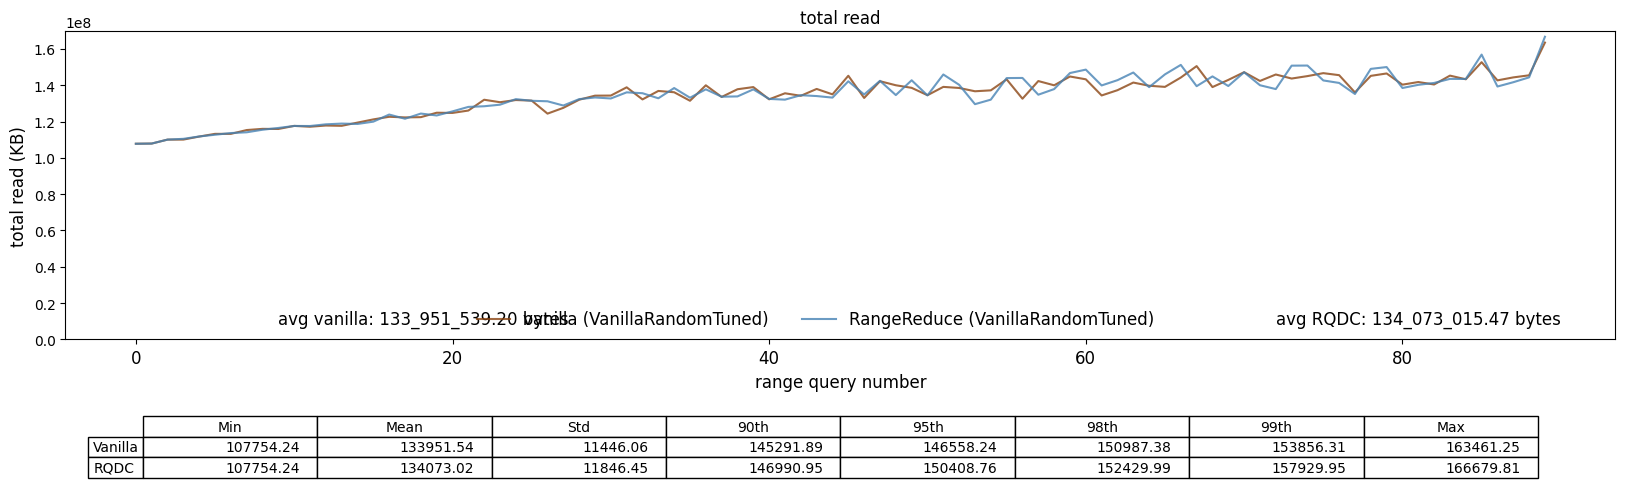

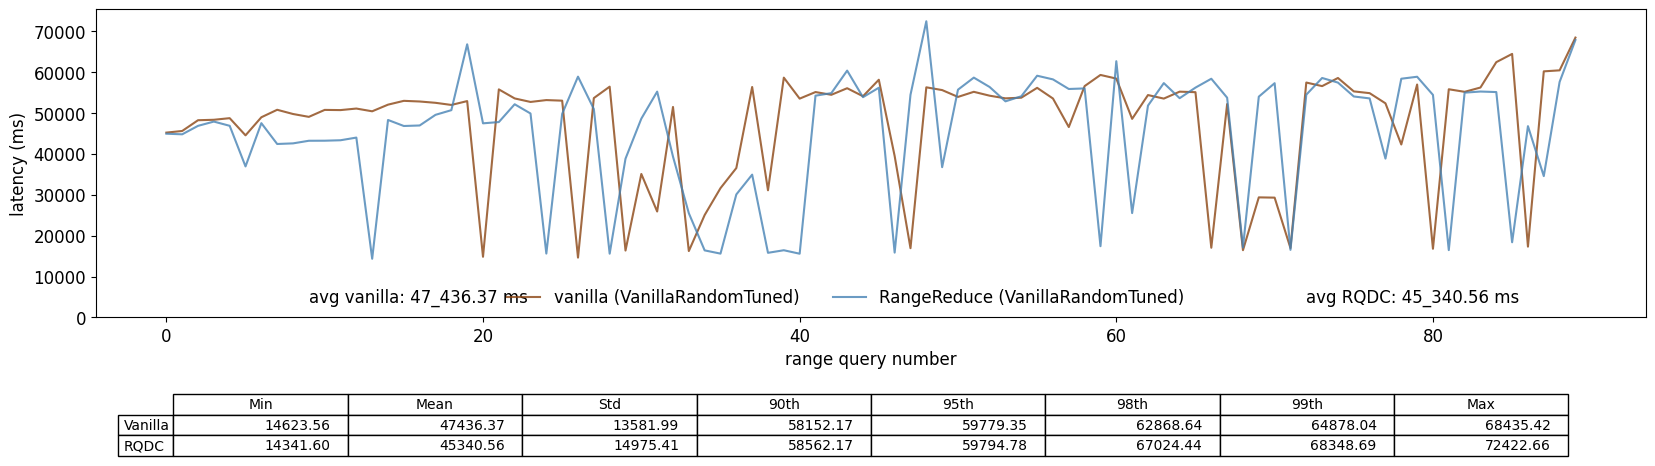

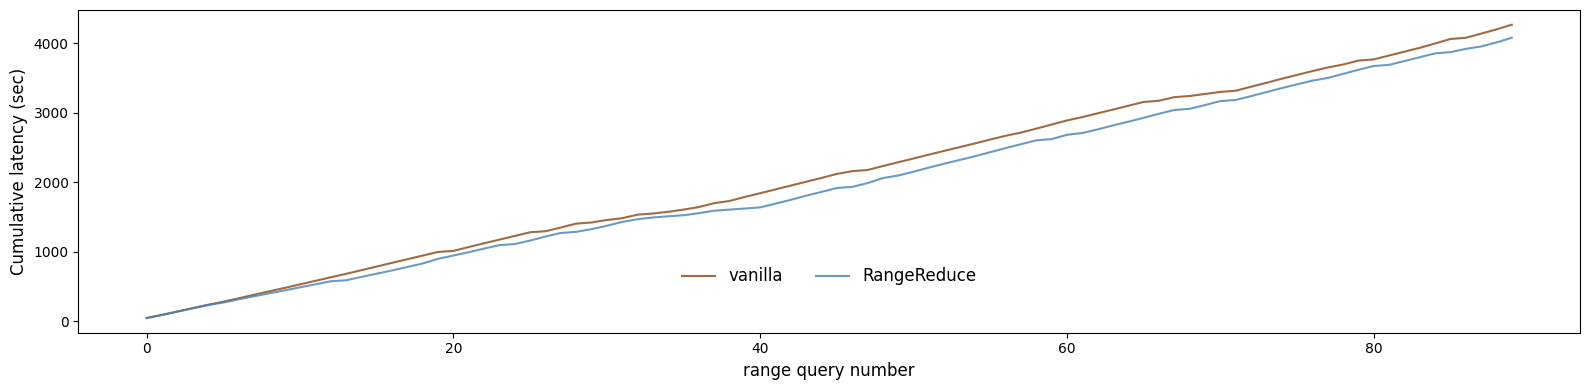

['Column Family Name: default, Size: 1561311877 bytes, Files Count: 429', 'Level Stats:', 'Level: 0, Files: 0, Size: 0 bytes', 'Level: 1, Files: 4, Size: 14701557 bytes', 'Level: 2, Files: 16, Size: 64525906 bytes', 'Level: 3, Files: 72, Size: 267002454 bytes', 'Level: 4, Files: 295, Size: 1066536927 bytes', 'Level: 5, Files: 42, Size: 148545033 bytes', 'Level: 6, Files: 0, Size: 0 bytes', 'Level: 7, Files: 0, Size: 0 bytes', 'Level: 8, Files: 0, Size: 0 bytes', 'Level: 9, Files: 0, Size: 0 bytes', 'Level: 10, Files: 0, Size: 0 bytes', 'Level: 11, Files: 0, Size: 0 bytes', 'Level: 12, Files: 0, Size: 0 bytes', 'Level: 13, Files: 0, Size: 0 bytes', 'Level: 14, Files: 0, Size: 0 bytes', 'Level: 15, Files: 0, Size: 0 bytes', 'Level: 16, Files: 0, Size: 0 bytes', 'Level: 17, Files: 0, Size: 0 bytes', 'Level: 18, Files: 0, Size: 0 bytes', 'Level: 19, Files: 0, Size: 0 bytes', '', 'RocksDB Statistics:', 'rocksdb.compact.read.bytes: 32416464600', 'rocksdb.compact.write.bytes: 31154473472', 'r

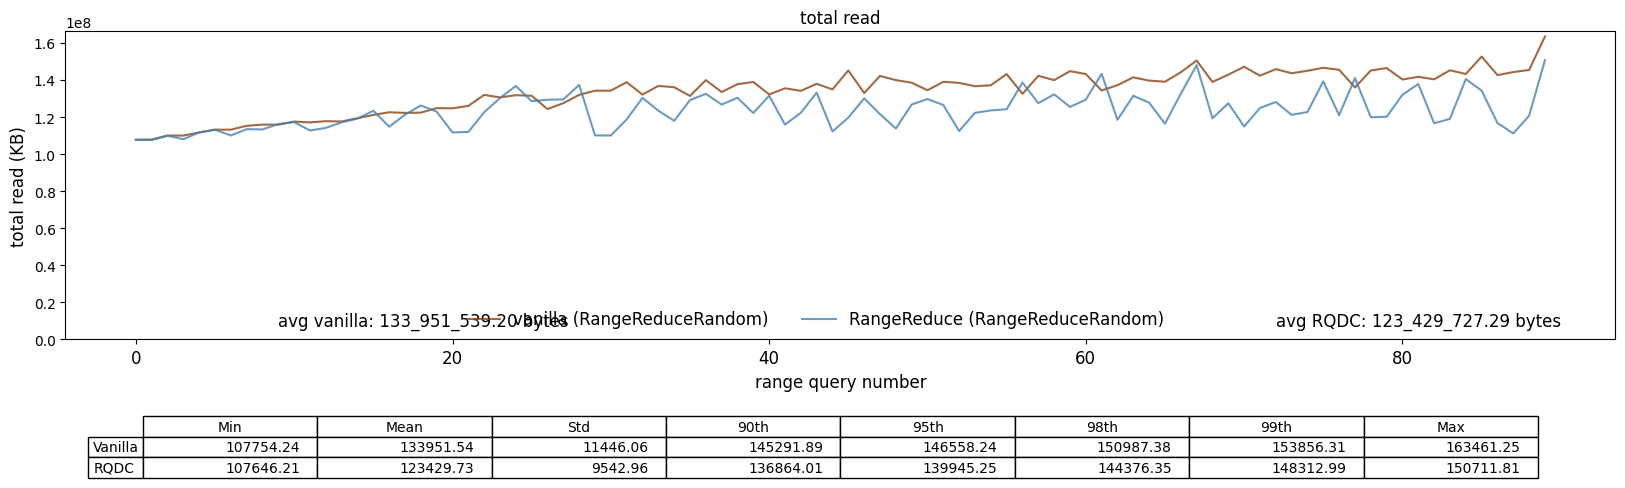

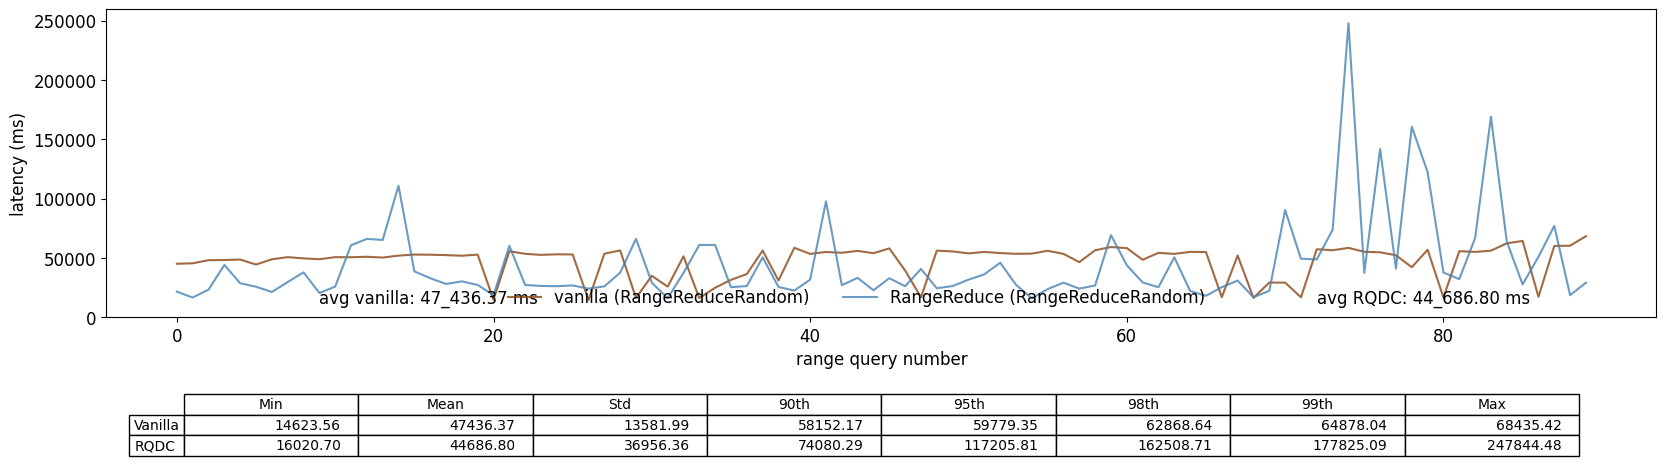

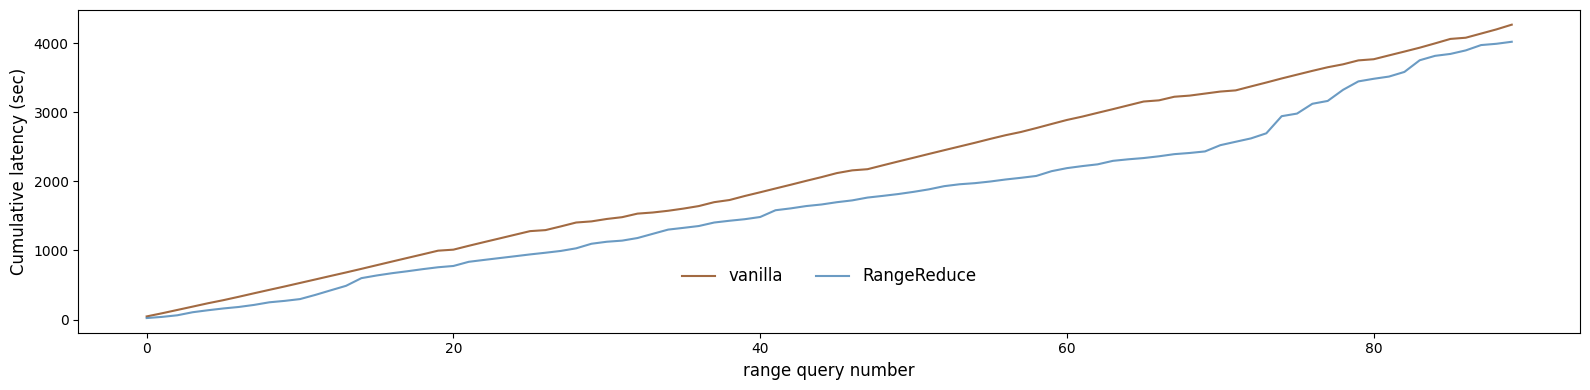

['Column Family Name: default, Size: 1561311877 bytes, Files Count: 429', 'Level Stats:', 'Level: 0, Files: 0, Size: 0 bytes', 'Level: 1, Files: 4, Size: 14701557 bytes', 'Level: 2, Files: 16, Size: 64525906 bytes', 'Level: 3, Files: 72, Size: 267002454 bytes', 'Level: 4, Files: 295, Size: 1066536927 bytes', 'Level: 5, Files: 42, Size: 148545033 bytes', 'Level: 6, Files: 0, Size: 0 bytes', 'Level: 7, Files: 0, Size: 0 bytes', 'Level: 8, Files: 0, Size: 0 bytes', 'Level: 9, Files: 0, Size: 0 bytes', 'Level: 10, Files: 0, Size: 0 bytes', 'Level: 11, Files: 0, Size: 0 bytes', 'Level: 12, Files: 0, Size: 0 bytes', 'Level: 13, Files: 0, Size: 0 bytes', 'Level: 14, Files: 0, Size: 0 bytes', 'Level: 15, Files: 0, Size: 0 bytes', 'Level: 16, Files: 0, Size: 0 bytes', 'Level: 17, Files: 0, Size: 0 bytes', 'Level: 18, Files: 0, Size: 0 bytes', 'Level: 19, Files: 0, Size: 0 bytes', '', 'RocksDB Statistics:', 'rocksdb.compact.read.bytes: 32416464600', 'rocksdb.compact.write.bytes: 31154473472', 'r

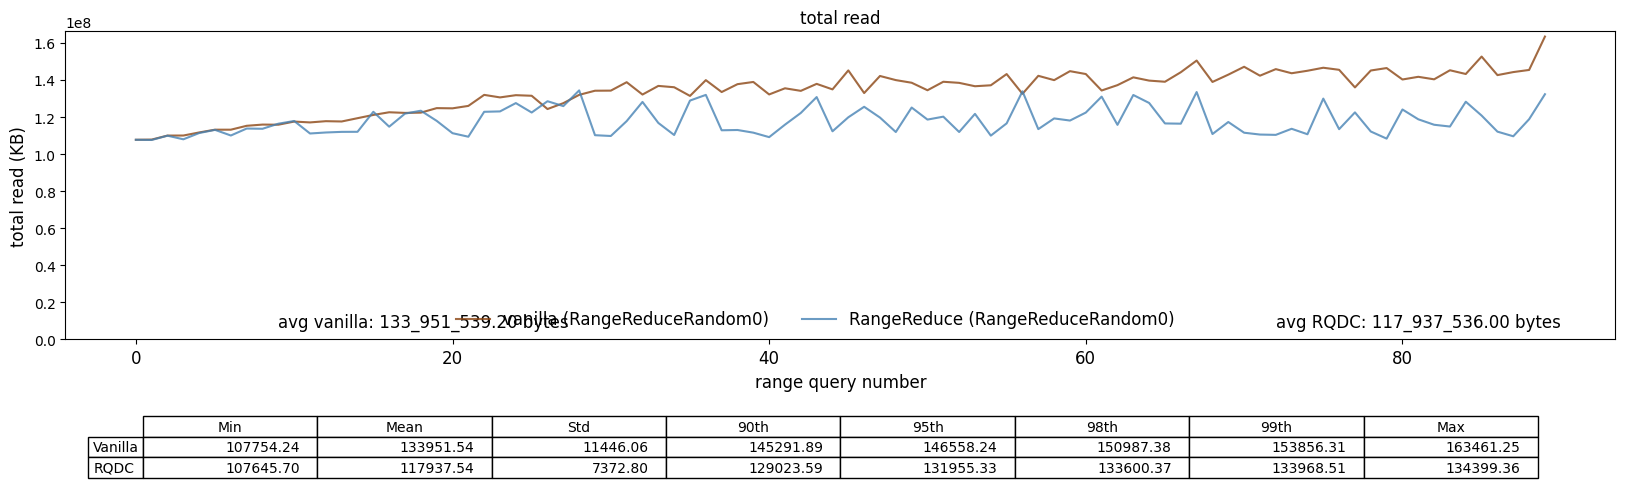

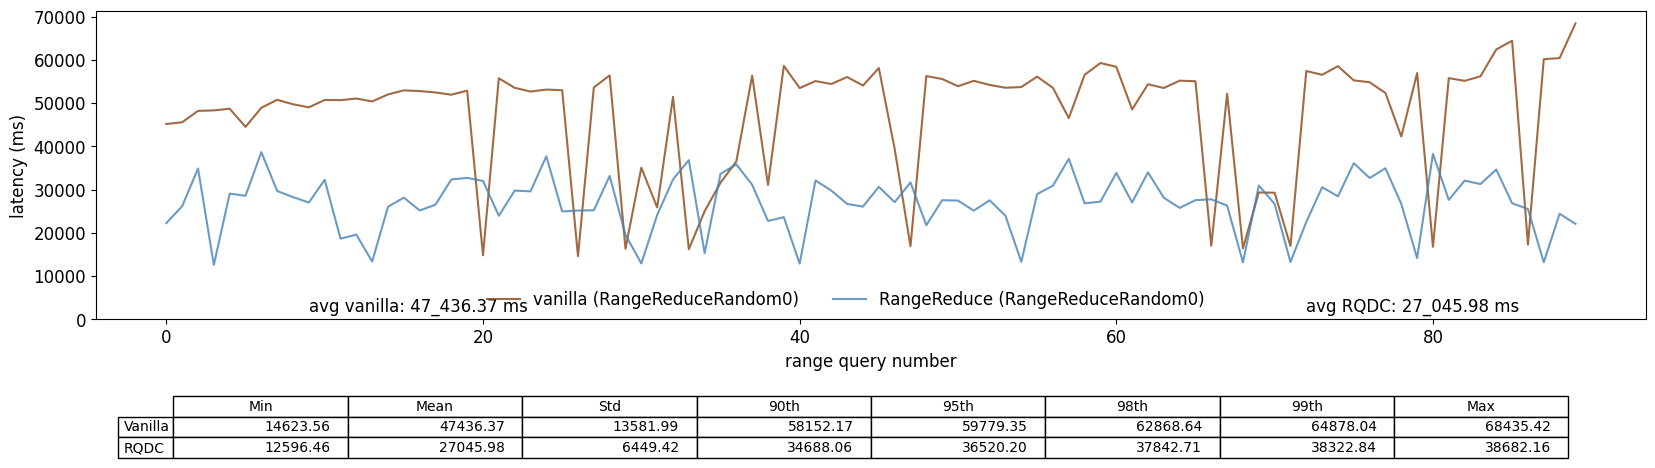

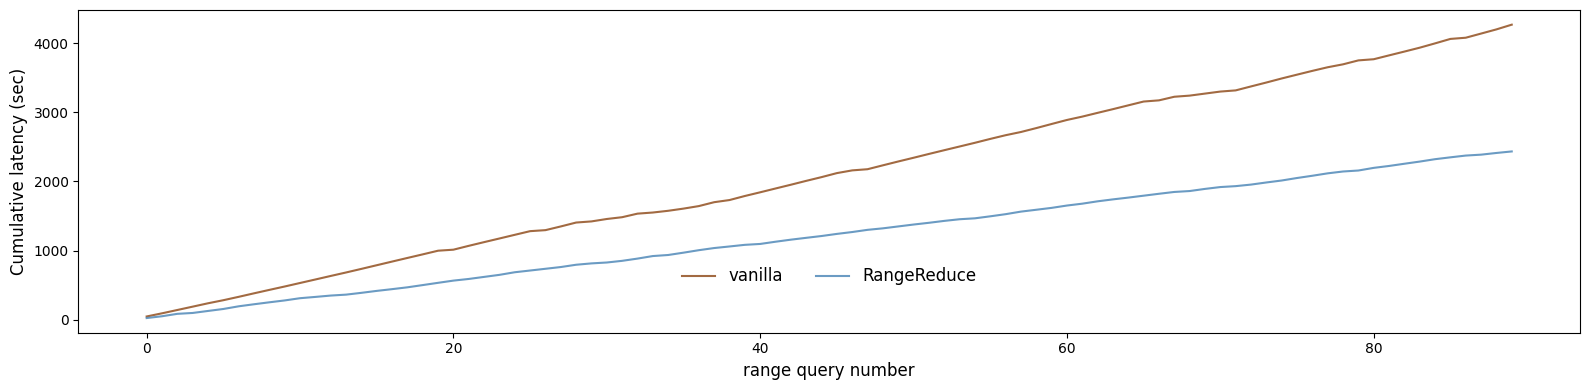

['Column Family Name: default, Size: 1561311877 bytes, Files Count: 429', 'Level Stats:', 'Level: 0, Files: 0, Size: 0 bytes', 'Level: 1, Files: 4, Size: 14701557 bytes', 'Level: 2, Files: 16, Size: 64525906 bytes', 'Level: 3, Files: 72, Size: 267002454 bytes', 'Level: 4, Files: 295, Size: 1066536927 bytes', 'Level: 5, Files: 42, Size: 148545033 bytes', 'Level: 6, Files: 0, Size: 0 bytes', 'Level: 7, Files: 0, Size: 0 bytes', 'Level: 8, Files: 0, Size: 0 bytes', 'Level: 9, Files: 0, Size: 0 bytes', 'Level: 10, Files: 0, Size: 0 bytes', 'Level: 11, Files: 0, Size: 0 bytes', 'Level: 12, Files: 0, Size: 0 bytes', 'Level: 13, Files: 0, Size: 0 bytes', 'Level: 14, Files: 0, Size: 0 bytes', 'Level: 15, Files: 0, Size: 0 bytes', 'Level: 16, Files: 0, Size: 0 bytes', 'Level: 17, Files: 0, Size: 0 bytes', 'Level: 18, Files: 0, Size: 0 bytes', 'Level: 19, Files: 0, Size: 0 bytes', '', 'RocksDB Statistics:', 'rocksdb.compact.read.bytes: 32416464600', 'rocksdb.compact.write.bytes: 31154473472', 'r

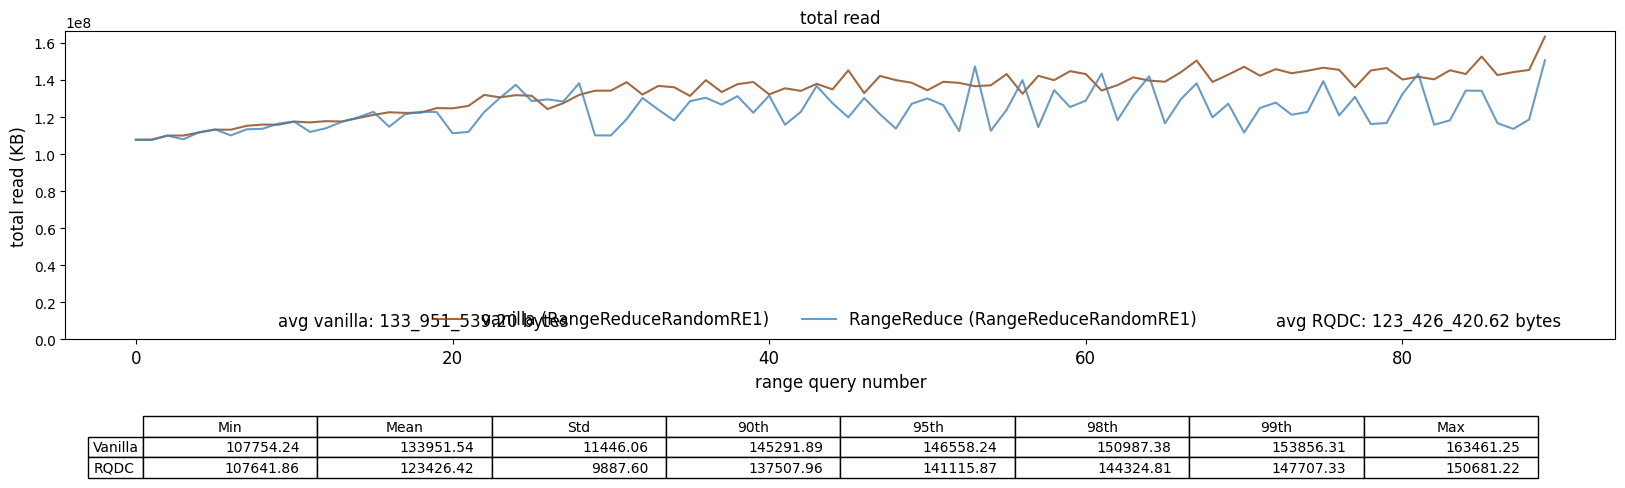

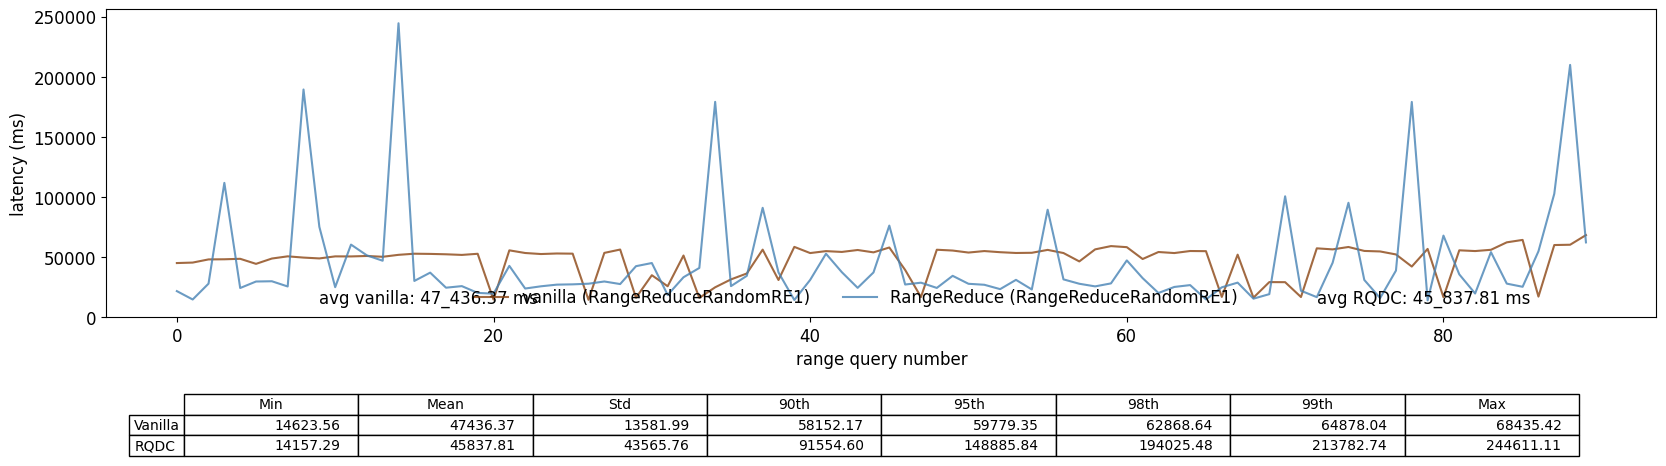

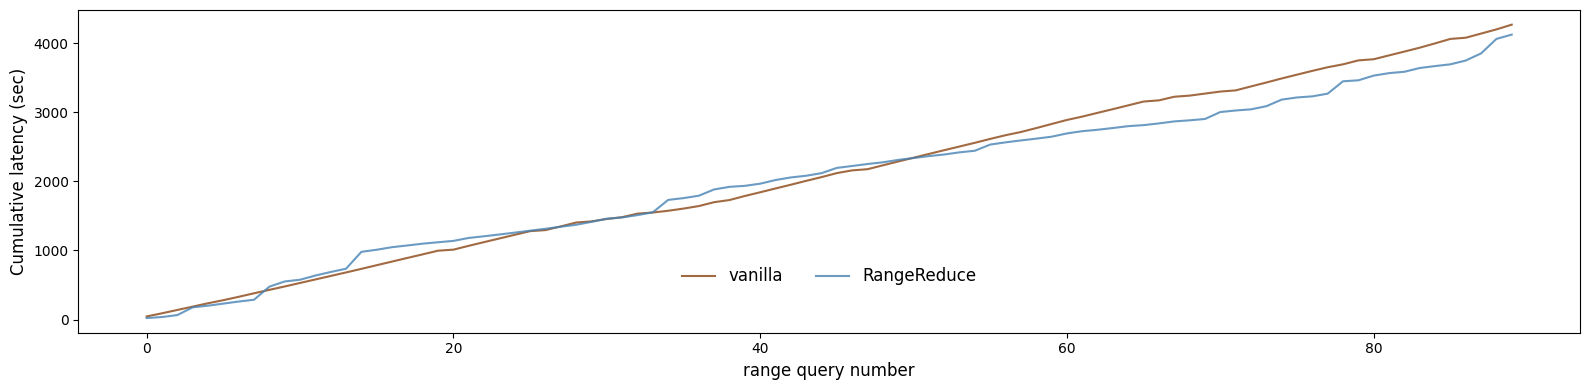

In [ ]:
random_rq_stats = dict()
random_rq_stats_for_rq = dict()

# same_rq_stats = dict()
# same_rq_stats_for_rq = dict()

# overlapping_rq_stats = dict()
# overlapping_rq_stats_for_rq = dict()

for epsilon in EPSILON_VALUES:
    lb = 1/(SIZE_RATIO + (SIZE_RATIO * epsilon))
    EXPDIRNAME = f"{PROJECT_DIR}/.vstats/experiments-{TAG}-U{UPDATES}-E{ENTRY_SIZE}-B{ENTRIES_PER_PAGE}-S{RANGE_QUERIES}-Y{SELECTIVITY}-T{SIZE_RATIO}"
    vandirpath = os.path.join(EXPDIRNAME, "VanillaRandom")
    rqdcdirpath = os.path.join(EXPDIRNAME, f"RangeReduceRandom{epsilon}")

    # vandirpath_overlapping_full = os.path.join(EXPDIRNAME, "VanillaOverlappingFull")
    # rqdcdirpath_overlapping_full = os.path.join(EXPDIRNAME, "RangeReduceOverlappingFull")

    # vandirpath_overlapping_partial = os.path.join(EXPDIRNAME, "VanillaOverlappingPartial")
    # rqdcdirpath_overlapping_partial = os.path.join(EXPDIRNAME, "RangeReduceOverlappingPartial")

    filesize = ENTRY_SIZE * ENTRIES_PER_PAGE * NUM_PAGE_PER_FILE

    van = EpochStats(vandirpath, NUMEPOCHS, filesize)
    rqdc = EpochStats(rqdcdirpath, NUMEPOCHS, filesize)

    # van_same_rq = EpochStats(vandirpath_overlapping_full, NUMEPOCHS, filesize)
    # rqdc_same_rq = EpochStats(rqdcdirpath_overlapping_full, NUMEPOCHS, filesize)

    # van_overlapping_rq = EpochStats(vandirpath_overlapping_partial, NUMEPOCHS, filesize)
    # rqdc_overlapping_rq = EpochStats(rqdcdirpath_overlapping_partial, NUMEPOCHS, filesize)

    random_rq_stats[SELECTIVITY] = SelectivityVsMetric(
        Vanilla=van.get_plotstats()[0],
        RangeReduce=rqdc.get_plotstats()[0],
    )

    # same_rq_stats[selectivity] = SelectivityVsMetric(
    #     Vanilla=van_same_rq.get_plotstats()[0],
    #     RangeReduce=rqdc_same_rq.get_plotstats()[0],
    # )

    # overlapping_rq_stats[selectivity] = SelectivityVsMetric(
    #     Vanilla=van_overlapping_rq.get_plotstats()[0],
    #     RangeReduce=rqdc_overlapping_rq.get_plotstats()[0],
    # )

    random_rq_stats_for_rq[SELECTIVITY] = SelectivityVsRangeQueryMetric(
        Vanilla=van.get_rangequerystats(),
        RangeReduce=rqdc.get_rangequerystats(),
    )

    # same_rq_stats_for_rq[selectivity] = SelectivityVsRangeQueryMetric(
    #     Vanilla=van_same_rq.get_rangequerystats(),
    #     RangeReduce=rqdc_same_rq.get_rangequerystats(),
    # )

    # overlapping_rq_stats_for_rq[selectivity] = SelectivityVsRangeQueryMetric(
    #     Vanilla=van_overlapping_rq.get_rangequerystats(),
    #     RangeReduce=rqdc_overlapping_rq.get_rangequerystats(),
    # )
    plot_exp = PlotRangeQueryStats(van.get_rangequerystats(), rqdc.get_rangequerystats())
    plot_exp.bytes_read_for_each_range_query(f"(epsilon={epsilon})")
    plot_exp.latency_for_each_range_query(f"(epsilon={epsilon})")
    plot_exp.cummulative_latency_for_range_queries(f"(epsilon={epsilon})")

In [4]:
# random_selectivities = PlotSelectivities(random_rq_stats)
# same_rq_selectivities = PlotSelectivities(same_rq_stats)
# overlapping_rq_selectivities = PlotSelectivities(overlapping_rq_stats)

In [5]:
# random_selectivities.plot_total_bytes_written(tag="random")
# same_rq_selectivities.plot_total_bytes_written(tag="same")
# overlapping_rq_selectivities.plot_total_bytes_written(tag="overlapping")

In [6]:
# random_selectivities.plot_compaction_debt(tag="random")
# same_rq_selectivities.plot_compaction_debt(tag="same")
# overlapping_rq_selectivities.plot_compaction_debt(tag="overlapping")

In [7]:
# random_selectivities.plot_write_amp_debt(tag="random")
# same_rq_selectivities.plot_write_amp_debt(tag="same")
# overlapping_rq_selectivities.plot_write_amp_debt(tag="overlapping")

In [8]:
# random_selectivities.plot_write_amp_full_debt(tag="random")
# same_rq_selectivities.plot_write_amp_full_debt(tag="same")
# overlapping_rq_selectivities.plot_write_amp_full_debt(tag="overlapping")

In [9]:
# random_selectivities.plot_space_amplification(tag="random")
# same_rq_selectivities.plot_space_amplification(tag="same")
# overlapping_rq_selectivities.plot_space_amplification(tag="overlapping")

In [10]:
# random_selectivities.plot_compaction_read(tag="random")
# same_rq_selectivities.plot_compaction_read(tag="same")
# overlapping_rq_selectivities.plot_compaction_read(tag="overlapping")

In [11]:
# PlotSelectivities.plot_total_data_movement(random_rq_stats, random_rq_stats_for_rq, tag="random")
# PlotSelectivities.plot_total_data_movement(same_rq_stats, same_rq_stats_for_rq, tag="same")
# PlotSelectivities.plot_total_data_movement(overlapping_rq_stats, overlapping_rq_stats_for_rq, tag="overlapping")

In [12]:
# random_selectivities_rq = PlotSelectivitiesRangeQuery(random_rq_stats_for_rq)
# same_rq_selectivities_rq = PlotSelectivitiesRangeQuery(same_rq_stats_for_rq)
# overlapping_rq_selectivities_rq = PlotSelectivitiesRangeQuery(overlapping_rq_stats_for_rq)

In [13]:
# random_selectivities_rq.avg_bytes_read_for_range_queries(tag='random')
# same_rq_selectivities_rq.avg_bytes_read_for_range_queries(tag='same')
# overlapping_rq_selectivities_rq.avg_bytes_read_for_range_queries(tag='overlapping')

In [14]:
# random_selectivities_rq.avg_bytes_written_for_range_queries(tag='random')
# same_rq_selectivities_rq.avg_bytes_written_for_range_queries(tag='same')
# overlapping_rq_selectivities_rq.avg_bytes_written_for_range_queries(tag='overlapping')

In [15]:
# random_selectivities_rq.avg_latency_for_range_queries(tag='random')
# same_rq_selectivities_rq.avg_latency_for_range_queries(tag='same')
# overlapping_rq_selectivities_rq.avg_latency_for_range_queries(tag='overlapping')

In [16]:
# plot_exp = PlotRangeQueryStats(van.get_rangequerystats(), rqdc.get_rangequerystats())
# plot_exp.bytes_read_for_each_range_query()
# plot_exp.latency_for_each_range_query()
# plot_exp.bytes_written_for_each_range_query()

In [17]:
# plot_exp = PlotRangeQueryStats(van_overlapping_rq.get_rangequerystats(), rqdc_overlapping_rq.get_rangequerystats())
# plot_exp.bytes_read_for_each_range_query(range_query_pattern="Same RQ")
# plot_exp.latency_for_each_range_query(range_query_pattern="Same RQ")
# plot_exp.bytes_written_for_each_range_query()

In [18]:
# plot_exp = PlotRangeQueryStats(van_overlapping_partial.get_rangequerystats(), rqdc_overlapping_partial.get_rangequerystats())
# plot_exp.bytes_read_for_each_range_query(range_query_pattern="Overlapping RQ")
# plot_exp.latency_for_each_range_query(range_query_pattern="Overlapping RQ")
# plot_exp.bytes_written_for_each_range_query()

In [15]:
from copy import deepcopy
import os
import re
from typing import List
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from plotter import *
from plotter.epochstats import EpochStats
from plotter.plotepochstats import PlotRangeQueryStats
from plotter.plotselectivities import PlotSelectivities, PlotSelectivitiesRangeQuery
from plotter.dataclass import SelectivityVsMetric, SelectivityVsRangeQueryMetric, AdditionalStats, RQColumn, PlottingStats
from plotter.utils import vanilla_dirname, rqdc_dirname

PROJECT_DIR = Path.cwd().parent.parent

In [60]:
class PlotRangeQueryStats:
    vanilla_plot_kwargs = {
        "label": "vanilla",
        "color": "saddlebrown",
    }
    rqdc_plot_kwargs = {
        "label": "RangeReduce",
        "color": "steelblue",
    }

    def __init__(self, vanilla: pd.DataFrame, vanilla_tuned: pd.DataFrame, rqdc: pd.DataFrame, rqdc_lb0: pd.DataFrame, rqdc_lvl_rename: pd.DataFrame):
        self._vanilla = vanilla.copy(deep=True)
        self._vanilla_tuned = vanilla_tuned.copy(deep=True)
        self._rqdc = rqdc.copy(deep=True)
        self._rqdc_lb0 = rqdc_lb0.copy(deep=True)
        self._rqdc_lvl_rename = rqdc_lvl_rename.copy(deep=True)

    def _get_percentiles(self, data: pd.Series) -> AdditionalStats:
        percentiles = data.quantile([0.9, 0.95, 0.98, 0.99]).to_dict()
        return AdditionalStats(
            min=data.min(),
            max=data.max(),
            mean=data.mean(),
            std=data.std(),
            p90th=percentiles[0.9],
            p95th=percentiles[0.95],
            p98th=percentiles[0.98],
            p99th=percentiles[0.99],
        )

    def _plot_percentiles(self, vanilla: AdditionalStats, rqdc: AdditionalStats, ax):
        cell_text = [
            [
                f"{vanilla.min:.2f}",
                f"{vanilla.mean:.2f}",
                f"{vanilla.std:.2f}",
                f"{vanilla.p90th:.2f}",
                f"{vanilla.p95th:.2f}",
                f"{vanilla.p98th:.2f}",
                f"{vanilla.p99th:.2f}",
                f"{vanilla.max:.2f}",
            ],
            [
                f"{rqdc.min:.2f}",
                f"{rqdc.mean:.2f}",
                f"{rqdc.std:.2f}",
                f"{rqdc.p90th:.2f}",
                f"{rqdc.p95th:.2f}",
                f"{rqdc.p98th:.2f}",
                f"{rqdc.p99th:.2f}",
                f"{rqdc.max:.2f}",
            ],
        ]
        rows = ["Vanilla", "RQDC"]

        # Add a table at the bottom of the axes
        ax.table(
            cellText=cell_text,
            rowLabels=rows,
            colLabels=["Min", "Mean", "Std", "90th", "95th", "98th", "99th", "Max"],
            loc="bottom",
            bbox=[0.05, -0.45, 0.9, 0.20],
        )

    def bytes_written_for_each_range_query(self):
        convert_to_ = (1000 ** 1)
        vanilla_rq_bytes = (
            self._vanilla[
                [
                    str(RQColumn.DATA_USEFUL_BYTES_WRITTEN),
                    str(RQColumn.DATA_UNUSEFUL_BYTES_WRITTEN),
                ]
            ]
            .sum(axis=1)
            .to_list()
        )
        rqdc_rq_bytes = (
            self._rqdc_lb0[
                [
                    str(RQColumn.DATA_USEFUL_BYTES_WRITTEN),
                    str(RQColumn.DATA_UNUSEFUL_BYTES_WRITTEN),
                ]
            ]
            .sum(axis=1)
            .to_list()
        )

        if len(vanilla_rq_bytes) != len(rqdc_rq_bytes):
            raise Exception("found different number of range queries")

        fig_size = (20, 4)
        fig, ax = plt.subplots(figsize=fig_size)

        # ax.plot(range(len(vanilla_rq_bytes)), vanilla_rq_bytes)
        ax.bar(range(len(rqdc_rq_bytes)), rqdc_rq_bytes, color="black")

        ax.set_ylabel("total write (MB)", fontsize=12)
        ax.set_xlabel("range query number", fontsize=12)

        ax.set_ylim(bottom=0)

        ax.xaxis.set_major_locator(ticker.FixedLocator(ax.get_xticks()))
        ax.set_xticklabels([f"{int(tick)}" for tick in ax.get_xticks()], fontsize=12)

        ax.yaxis.set_major_locator(ticker.FixedLocator(ax.get_yticks()))
        ax.set_yticklabels(
            [f"{int(i/convert_to_)}" if i != 0 else "0" for i in ax.get_yticks()],
            fontsize=12,
        )
        ax.set_title("total write (RQDC range query)", fontsize=12)

        ax.annotate(
            f"success count: {sum([x > 0 for x in rqdc_rq_bytes])}",
            xy=(int(len(rqdc_rq_bytes) * 0.10), int(max(rqdc_rq_bytes) * 0.95)),
            fontsize=12,
        )
        ax.annotate(
            f"total bytes written: {sum(rqdc_rq_bytes):_.2f} bytes",
            xy=(int(len(rqdc_rq_bytes) * 0.75), int(max(rqdc_rq_bytes) * 0.95)),
            fontsize=12,
        )

        plt.show()

    def bytes_read_for_each_range_query(self, range_query_pattern=""):
        convert_to_ = (1000 ** 1)
        vanilla_rq_bytes = (
            self._vanilla[[str(RQColumn.TOTAL_ENTRIES_READ)]]
            .apply(lambda x: x * ENTRY_SIZE)[str(RQColumn.TOTAL_ENTRIES_READ)]
            .to_list()
        )
        vanilla_tuned_rq_bytes = (
            self._vanilla_tuned[[str(RQColumn.TOTAL_ENTRIES_READ)]]
            .apply(lambda x: x * ENTRY_SIZE)[str(RQColumn.TOTAL_ENTRIES_READ)]
            .to_list()
        )
        rqdc_rq_bytes = (
            self._rqdc[[str(RQColumn.TOTAL_ENTRIES_READ)]]
            .apply(lambda x: x * ENTRY_SIZE)[str(RQColumn.TOTAL_ENTRIES_READ)]
            .to_list()
        )
        rqdc_lb0_rq_bytes = (
            self._rqdc_lb0[[str(RQColumn.TOTAL_ENTRIES_READ)]]
            .apply(lambda x: x * ENTRY_SIZE)[str(RQColumn.TOTAL_ENTRIES_READ)]
            .to_list()
        )
        rqdc_lvl_re_rq_bytes = (
            self._rqdc_lvl_rename[[str(RQColumn.TOTAL_ENTRIES_READ)]]
            .apply(lambda x: x * ENTRY_SIZE)[str(RQColumn.TOTAL_ENTRIES_READ)]
            .to_list()
        )

        if len(vanilla_rq_bytes) != len(rqdc_rq_bytes):
            raise Exception("found different number of range queries")

        fig_size = (20, 4)
        fig, ax = plt.subplots(figsize=fig_size)

        ax.plot(
            range(len(vanilla_rq_bytes)),
            vanilla_rq_bytes,
            label=f"{self.vanilla_plot_kwargs['label']}",
            # color=self.vanilla_plot_kwargs["color"],
            alpha=0.8,
        )
        ax.plot(
            range(len(vanilla_tuned_rq_bytes)),
            vanilla_tuned_rq_bytes,
            label=f"{self.vanilla_plot_kwargs['label']} tuned",
            # color=self.vanilla_plot_kwargs["color"],
            alpha=0.8,
        )
        ax.plot(
            range(len(rqdc_rq_bytes)),
            rqdc_rq_bytes,
            label=f"{self.rqdc_plot_kwargs['label']}",
            # color=self.rqdc_plot_kwargs["color"],
            alpha=0.8,
        )
        ax.plot(
            range(len(rqdc_lb0_rq_bytes)),
            rqdc_lb0_rq_bytes,
            label=f"{self.rqdc_plot_kwargs['label']} LB0",
            # color=self.rqdc_plot_kwargs["color"],
            alpha=0.8,
        )
        ax.plot(
            range(len(rqdc_lvl_re_rq_bytes)),
            rqdc_lvl_re_rq_bytes,
            label=f"{self.rqdc_plot_kwargs['label']} RE1",
            # color=self.rqdc_plot_kwargs["color"],
            alpha=0.8,
        )

        ax.set_ylabel("total read (KB)", fontsize=12)
        ax.set_xlabel("range query number", fontsize=12)

        ax.set_ylim(bottom=0)

        ax.xaxis.set_major_locator(ticker.FixedLocator(ax.get_xticks()))
        ax.set_xticklabels([f"{int(tick)}" for tick in ax.get_xticks()], fontsize=12)

        # ax.yaxis.set_major_locator(ticker.FixedLocator(ax.get_yticks()))
        # ax.set_yticklabels(
        #     [f"{int(i/convert_to_)}" if i != 0 else "0" for i in ax.get_yticks()],
        #     fontsize=12,
        # )
        ax.set_title("total read", fontsize=12)

        fig.legend(
            loc="lower center",
            ncol=2,
            fontsize=12,
            bbox_to_anchor=(0.5, 0.1),
            frameon=False,
        )
        ax.annotate(
            f"avg vanilla: {(sum(vanilla_rq_bytes)/len(vanilla_rq_bytes)):_.2f} bytes",
            xy=(int(len(rqdc_rq_bytes) * 0.10), int(max(rqdc_rq_bytes) * 0.05)),
            fontsize=12,
        )
        ax.annotate(
            f"avg RQDC: {sum(rqdc_rq_bytes)/len(rqdc_rq_bytes):_.2f} bytes",
            xy=(int(len(rqdc_rq_bytes) * 0.80), int(max(rqdc_rq_bytes) * 0.05)),
            fontsize=12,
        )

        self._plot_percentiles(
            self._get_percentiles(pd.Series([x/convert_to_ for x in vanilla_rq_bytes])),
            self._get_percentiles(pd.Series([x/convert_to_ for x in rqdc_rq_bytes])),
            ax,
        )

        plt.show()

    def latency_for_each_range_query(self, range_query_pattern=""):

        plotting_column = str(RQColumn.RQ_TOTAL_TIME)
        convert_to_ = (1000 ** 2)

        vanilla_rq_time = self._vanilla[plotting_column].to_list()
        vanilla_tuned_rq_time = self._vanilla_tuned[plotting_column].to_list()
        rqdc_rq_time = self._rqdc[plotting_column].to_list()
        rqdc_lb0_rq_time = self._rqdc_lb0[plotting_column].to_list()
        rqdc_lvl_re_rq_time = self._rqdc_lvl_rename[plotting_column].to_list()

        if len(vanilla_rq_time) != len(rqdc_rq_time):
            raise Exception("found different number of range queries")

        fig_size = (20, 4)
        fig, ax = plt.subplots(figsize=fig_size)

        ax.plot(
            range(len(vanilla_rq_time)),
            vanilla_rq_time,
            label=f"{self.vanilla_plot_kwargs['label']}",
            # color=self.vanilla_plot_kwargs["color"],
            alpha=0.8,
        )
        ax.plot(
            range(len(vanilla_tuned_rq_time)),
            vanilla_tuned_rq_time,
            label=f"{self.vanilla_plot_kwargs['label']} tuned",
            # color=self.vanilla_plot_kwargs["color"],
            alpha=0.8,
        )
        ax.plot(
            range(len(rqdc_rq_time)),
            rqdc_rq_time,
            label=f"{self.rqdc_plot_kwargs['label']}",
            # color=self.rqdc_plot_kwargs["color"],
            alpha=0.8,
        )
        ax.plot(
            range(len(rqdc_lb0_rq_time)),
            rqdc_lb0_rq_time,
            label=f"{self.rqdc_plot_kwargs['label']} LB0",
            # color=self.rqdc_plot_kwargs["color"],
            alpha=0.8,
        )
        ax.plot(
            range(len(rqdc_lvl_re_rq_time)),
            rqdc_lvl_re_rq_time,
            label=f"{self.rqdc_plot_kwargs['label']} RE1",
            # color=self.rqdc_plot_kwargs["color"],
            alpha=0.8,
        )
        ax.set_ylabel("latency (ms)", fontsize=12)
        ax.set_xlabel("range query number", fontsize=12)

        ax.set_ylim(bottom=0)

        ax.xaxis.set_major_locator(ticker.FixedLocator(ax.get_xticks()))
        ax.set_xticklabels([f"{int(tick)}" for tick in ax.get_xticks()], fontsize=12)

        ax.yaxis.set_major_locator(ticker.FixedLocator(ax.get_yticks()))
        ax.set_yticklabels(
            [f"{int(i/convert_to_)}" if i != 0 else "0" for i in ax.get_yticks()],
            fontsize=12,
        )

        fig.legend(
            loc="lower center",
            ncol=2,
            fontsize=12,
            bbox_to_anchor=(0.5, 0.95),
            frameon=False,
        )

        ax.annotate(
            f"avg vanilla: {self._vanilla[plotting_column].mean()/convert_to_:_.2f} ms",
            xy=(int(len(rqdc_rq_time) * 0.10), int(max(rqdc_rq_time) * 0.95)),
            fontsize=12,
        )
        ax.annotate(
            f"avg RQDC: {self._rqdc[plotting_column].mean()/convert_to_:_.2f} ms",
            xy=(int(len(rqdc_rq_time) * 0.80), int(max(rqdc_rq_time) * 0.95)),
            fontsize=12,
        )

        self._plot_percentiles(
            self._get_percentiles(pd.Series([x/convert_to_ for x in vanilla_rq_time])),
            self._get_percentiles(pd.Series([x/convert_to_ for x in rqdc_rq_time])),
            ax,
        )

        plt.show()

    def plot_cpu_cycles(self, range_query_pattern=""):

        plotting_column = str(RQColumn.CPU_CYCLES)
        convert_to_ = 1

        vanilla_rq_time = self._vanilla[plotting_column].to_list()
        rqdc_rq_time = self._rqdc[plotting_column].to_list()

        if len(vanilla_rq_time) != len(rqdc_rq_time):
            raise Exception("found different number of range queries")

        fig_size = (20, 4)
        fig, ax = plt.subplots(figsize=fig_size)

        ax.plot(
            range(len(vanilla_rq_time)),
            vanilla_rq_time,
            label=f"{self.vanilla_plot_kwargs['label']}",
            color=self.vanilla_plot_kwargs["color"],
            alpha=0.8,
        )
        ax.plot(
            range(len(rqdc_rq_time)),
            rqdc_rq_time,
            label=f"{self.rqdc_plot_kwargs['label']} {range_query_pattern}",
            color=self.rqdc_plot_kwargs["color"],
            alpha=0.8,
        )

        ax.set_ylabel("cpu cycles", fontsize=12)
        ax.set_xlabel("range query number", fontsize=12)

        ax.set_ylim(bottom=0)

        ax.xaxis.set_major_locator(ticker.FixedLocator(ax.get_xticks()))
        ax.set_xticklabels([f"{int(tick)}" for tick in ax.get_xticks()], fontsize=12)

        ax.yaxis.set_major_locator(ticker.FixedLocator(ax.get_yticks()))
        ax.set_yticklabels(
            [f"{int(i/convert_to_)}" if i != 0 else "0" for i in ax.get_yticks()],
            fontsize=12,
        )

        fig.legend(
            loc="lower center",
            ncol=2,
            fontsize=12,
            bbox_to_anchor=(0.5, 0.1),
            frameon=False,
        )

        ax.annotate(
            f"avg vanilla: {self._vanilla[plotting_column].mean()/convert_to_:_.2f} ms",
            xy=(int(len(rqdc_rq_time) * 0.10), int(max(rqdc_rq_time) * 0.05)),
            fontsize=12,
        )
        ax.annotate(
            f"avg RQDC: {self._rqdc[plotting_column].mean()/convert_to_:_.2f} ms",
            xy=(int(len(rqdc_rq_time) * 0.80), int(max(rqdc_rq_time) * 0.05)),
            fontsize=12,
        )

        self._plot_percentiles(
            self._get_percentiles(pd.Series([x/convert_to_ for x in vanilla_rq_time])),
            self._get_percentiles(pd.Series([x/convert_to_ for x in rqdc_rq_time])),
            ax,
        )

        plt.show()

    def cummulative_latency_for_range_queries(self, range_query_pattern=""):
        plotting_column = str(RQColumn.RQ_TOTAL_TIME)
        convert_to_ = (1000 ** 3)

        vanilla_rq_time = self._vanilla[plotting_column].to_list()
        vanilla_tuned_rq_time = self._vanilla_tuned[plotting_column].to_list()
        rqdc_rq_time = self._rqdc[plotting_column].to_list()
        rqdc_lb0_rq_time = self._rqdc_lb0[plotting_column].to_list()
        rqdc_lvl_re_rq_time = self._rqdc_lvl_rename[plotting_column].to_list()

        if len(vanilla_rq_time) != len(rqdc_rq_time):
            raise Exception("found different number of range queries")

        fig_size = (16, 4)
        fig, ax = plt.subplots(figsize=fig_size)

        # Cumulative Plot
        vanilla_cumulative = pd.Series(vanilla_rq_time).cumsum() / convert_to_
        vanilla_tuned_cummulative = pd.Series(vanilla_tuned_rq_time).cumsum() / convert_to_
        rqdc_cumulative = pd.Series(rqdc_rq_time).cumsum() / convert_to_
        rqdc_lb0_cummulative = pd.Series(rqdc_lb0_rq_time).cumsum() / convert_to_
        rqdc_lvl_re_rq_cummulative = pd.Series(rqdc_lvl_re_rq_time).cumsum() / convert_to_

        ax.plot(
            range(len(vanilla_cumulative)),
            vanilla_cumulative,
            label=f"{self.vanilla_plot_kwargs['label']}",
            # color=self.vanilla_plot_kwargs["color"],
            alpha=0.8,
        )
        ax.plot(
            range(len(vanilla_tuned_cummulative)),
            vanilla_tuned_cummulative,
            label=f"{self.vanilla_plot_kwargs['label']} tuned",
            # color=self.vanilla_plot_kwargs["color"],
            alpha=0.8,
        )
        ax.plot(
            range(len(rqdc_cumulative)),
            rqdc_cumulative,
            label=f"{self.rqdc_plot_kwargs['label']}",
            # color=self.rqdc_plot_kwargs["color"],
            alpha=0.8,
        )
        ax.plot(
            range(len(rqdc_lb0_cummulative)),
            rqdc_lb0_cummulative,
            label=f"{self.rqdc_plot_kwargs['label']} LB0",
            # color=self.rqdc_plot_kwargs["color"],
            alpha=0.8,
        )
        ax.plot(
            range(len(rqdc_lvl_re_rq_cummulative)),
            rqdc_lvl_re_rq_cummulative,
            label=f"{self.rqdc_plot_kwargs['label']} RE1",
            # color=self.rqdc_plot_kwargs["color"],
            alpha=0.8,
        )
        ax.set_ylabel("Cumulative latency (sec)", fontsize=12)
        ax.set_xlabel("range query number", fontsize=12)
        ax.legend(
            loc="lower center",
            ncol=2,
            fontsize=12,
            bbox_to_anchor=(0.5, 0.1),
            frameon=False,
        )

        plt.tight_layout()
        plt.show()


In [61]:
class PlotEpochStats:
    bar_kwargs = {
        "vanilla": {
            "label": "vanilla",
            "color": "None",
            "hatch": "",
            "edgecolor": "black",
        },
        "vanillaTuned": {
            "label": "vanillaTuned",
            "color": "None",
            "hatch": "//",
            "edgecolor": "black",
        },
        "rqdc": {
            "label": "rqdc",
            "color": "None",
            "hatch": "--",
            "edgecolor": "black",
        },
        "rqdcLb0": {
            "label": "rqdcLb0",
            "color": "None",
            "hatch": "\\\\",
            "edgecolor": "black",
        },
        "rqdcLvlRename": {
            "label": "rqdcLvlRename",
            "color": "None",
            "hatch": "xx",
            "edgecolor": "black",
        },
    }

    vanilla_bar_kwargs = {
        # "label": "vanilla",
        "color": "None",
        "hatch": "",
        "edgecolor": "black",
    }
    rqdc_bar_kwargs = {
        # "label": "RangeReduce",
        "color": "None",
        "hatch": "--",
        "edgecolor": "black",
    }

    def __init__(self, vanilla: List[PlottingStats], vanilla_tuned: List[PlottingStats], rqdc: List[PlottingStats], rqdc_lb0: List[PlottingStats], rqdc_lvl_rename: List[PlottingStats]):
        if len(vanilla) != len(rqdc):
            raise Exception("lengths of vanilla and rqdc stats are not the same")
        self._vanilla: List[PlottingStats] = deepcopy(vanilla)
        self._vanilla_tuned: List[PlottingStats] = deepcopy(vanilla_tuned)
        self._rqdc: List[PlottingStats] = deepcopy(rqdc)
        self._rqdc_lb0: List[PlottingStats] = deepcopy(rqdc_lb0)
        self._rqdc_lvl_rename: List[PlotEpochStats] = deepcopy(rqdc_lvl_rename)

    def plot_total_bytes_written(self):
        convert_to_ = 1024 ** 3
        vanilla_writes = [(van.CompactionWrittenBytes) / convert_to_ for van in self._vanilla]
        vanilla_tuned_writes = [(van.CompactionWrittenBytes) / convert_to_ for van in self._vanilla_tuned]
        rqdc_writes = [(rqdc.CompactionWrittenBytes + rqdc.RangeReduceWrittenBytes) / convert_to_ for rqdc in self._rqdc]
        rqdc_lb0_writes = [(rqdc.CompactionWrittenBytes + rqdc.RangeReduceWrittenBytes) / convert_to_ for rqdc in self._rqdc_lb0]
        rqdc_lvl_rename_writes = [(rqdc.CompactionWrittenBytes + rqdc.RangeReduceWrittenBytes) / convert_to_ for rqdc in self._rqdc_lvl_rename]

        fig_size = (6, 4)
        bar_width = 0.15  # Reduce bar width to fit all bars properly
        epochs = NUMEPOCHS
        index = np.arange(epochs)
        fig, ax = plt.subplots(figsize=fig_size)

        # Properly offset each group of bars
        ax.bar(index - 2 * bar_width, vanilla_writes, bar_width, **self.bar_kwargs["vanilla"])
        ax.bar(index - bar_width, vanilla_tuned_writes, bar_width, **self.bar_kwargs["vanillaTuned"])
        ax.bar(index, rqdc_writes, bar_width, **self.bar_kwargs["rqdc"])
        ax.bar(index + bar_width, rqdc_lb0_writes, bar_width, **self.bar_kwargs["rqdcLb0"])
        ax.bar(index + 2 * bar_width, rqdc_lvl_rename_writes, bar_width, **self.bar_kwargs["rqdcLvlRename"])

        ax.set_ylabel("total write (GB)", fontsize=12)
        ax.set_xlabel("epoch", fontsize=12)
        ax.set_ylim(bottom=0, top=max(rqdc_lb0_writes) + max(rqdc_lb0_writes) * 0.15)
        ax.set_xticks(index)
        ax.set_xticklabels([f"{epoch}" for epoch in range(1, epochs + 1)], fontsize=12)
        # ax.set_title("Total Write (Compaction + RangeReduce Compactions)", fontsize=12)

        fig.legend(loc="upper center", ncol=2, fontsize=12, bbox_to_anchor=(0.5, 0.90), frameon=False)
        plt.show()

    def plot_database_size(self):
        vanilla_compaction_debt = [van.DBSize for van in self._vanilla]
        vanilla_tuned_compaction_debt = [van.DBSize for van in self._vanilla_tuned]
        rqdc_compaction_debt = [rqdc.DBSize for rqdc in self._rqdc]
        rqdc_lb0_compaction_debt = [rqdc.DBSize for rqdc in self._rqdc_lb0]
        rqdc_lvl_rename_compaction_debt = [rqdc.DBSize for rqdc in self._rqdc_lvl_rename]

        fig_size = (6, 4)
        bar_width = 0.15
        # num_bars_per_group = 2
        epochs = NUMEPOCHS

        index = np.arange(epochs)
        fig, ax = plt.subplots(figsize=fig_size)

        ax.bar(
            index - 2 * bar_width,
            vanilla_compaction_debt,
            bar_width,
            **self.bar_kwargs["vanilla"],
        )
        ax.bar(
            index - bar_width,
            vanilla_tuned_compaction_debt,
            bar_width,
            **self.bar_kwargs["vanillaTuned"],
        )
        ax.bar(
            index,
            rqdc_compaction_debt,
            bar_width,
            **self.bar_kwargs["rqdc"],
        )
        ax.bar(
            index + bar_width,
            rqdc_lb0_compaction_debt,
            bar_width,
            **self.bar_kwargs["rqdcLb0"],
        )
        ax.bar(
            index + 2 * bar_width,
            rqdc_lvl_rename_compaction_debt,
            bar_width,
            **self.bar_kwargs["rqdcLvlRename"],
        )

        ax.set_ylabel("Database Size (MB)", fontsize=12)
        ax.set_xlabel("epoch", fontsize=12)

        ax.set_ylim(bottom=0, top=max(vanilla_compaction_debt) + max(vanilla_compaction_debt) * 0.35)

        ax.set_xticks(range(epochs))
        ax.set_xticklabels([f"{epoch}" for epoch in range(1, epochs + 1)], fontsize=12)

        ax.yaxis.set_major_locator(ticker.FixedLocator(ax.get_yticks()))
        ax.set_yticklabels(
            [f"{int(i/(1000 ** 2))}" if i != 0 else "0" for i in ax.get_yticks()],
            fontsize=12,
        )

        # ax.set_title("compaction debt", fontsize=12)

        fig.legend(
            loc="upper center",
            ncol=2,
            fontsize=12,
            bbox_to_anchor=(0.5, 0.98),
            frameon=False,
        )
        plt.show()

    def plot_compaction_debt(self):
        vanilla_compaction_debt = [van.CompactionDebt for van in self._vanilla]
        vanilla_tuned_compaction_debt = [van.DBSize for van in self._vanilla_tuned]
        rqdc_compaction_debt = [rqdc.DBSize for rqdc in self._rqdc]
        rqdc_lb0_compaction_debt = [rqdc.DBSize for rqdc in self._rqdc_lb0]
        rqdc_lvl_rename_compaction_debt = [rqdc.DBSize for rqdc in self._rqdc_lvl_rename]

        fig_size = (6, 4)
        bar_width = 0.35
        num_bars_per_group = 2
        epochs = NUMEPOCHS

        index = np.arange(epochs)
        fig, ax = plt.subplots(figsize=fig_size)

        ax.bar(
            index - 2 * bar_width,
            vanilla_compaction_debt,
            bar_width,
            **self.bar_kwargs["vanilla"],
        )
        ax.bar(
            index - bar_width,
            vanilla_tuned_compaction_debt,
            bar_width,
            **self.bar_kwargs["vanillaTuned"],
        )
        ax.bar(
            index,
            rqdc_compaction_debt,
            bar_width,
            **self.bar_kwargs["rqdc"],
        )
        ax.bar(
            index + bar_width,
            rqdc_lb0_compaction_debt,
            bar_width,
            **self.bar_kwargs["rqdcLb0"],
        )
        ax.bar(
            index + 2 * bar_width,
            rqdc_lvl_rename_compaction_debt,
            bar_width,
            **self.bar_kwargs["rqdcLvlRename"],
        )

        ax.set_ylabel("compaction debt (MB)", fontsize=12)
        ax.set_xlabel("epoch", fontsize=12)

        ax.set_ylim(bottom=0, top=max(vanilla_compaction_debt) + max(vanilla_compaction_debt) * 0.35)

        ax.set_xticks(range(epochs))
        ax.set_xticklabels([f"{epoch}" for epoch in range(1, epochs + 1)], fontsize=12)

        ax.yaxis.set_major_locator(ticker.FixedLocator(ax.get_yticks()))
        ax.set_yticklabels(
            [f"{int(i/(1000 ** 2))}" if i != 0 else "0" for i in ax.get_yticks()],
            fontsize=12,
        )

        # ax.set_title("compaction debt", fontsize=12)

        fig.legend(
            loc="upper center",
            ncol=2,
            fontsize=12,
            bbox_to_anchor=(0.5, 0.98),
            frameon=False,
        )
        plt.show()

    def plot_write_amp_debt(self):
        vanilla_compaction_debt = [van.WriteAmpDebt for van in self._vanilla]
        rqdc_compaction_debt = [rqdc.WriteAmpDebt for rqdc in self._rqdc]

        fig_size = (6, 4)
        bar_width = 0.35
        num_bars_per_group = 2
        epochs = NUMEPOCHS

        index = np.arange(epochs)
        fig, ax = plt.subplots(figsize=fig_size)

        ax.bar(
            index - (bar_width / num_bars_per_group),
            vanilla_compaction_debt,
            bar_width,
            **self.vanilla_bar_kwargs,
        )
        ax.bar(
            index + (bar_width / num_bars_per_group),
            rqdc_compaction_debt,
            bar_width,
            **self.rqdc_bar_kwargs,
        )

        ax.set_ylabel("write amp. debt (MB)", fontsize=12)
        ax.set_xlabel("epoch", fontsize=12)

        ax.set_ylim(bottom=0)

        ax.set_xticks(range(epochs))
        ax.set_xticklabels([f"{epoch}" for epoch in range(1, epochs + 1)], fontsize=12)

        ax.yaxis.set_major_locator(ticker.FixedLocator(ax.get_yticks()))
        ax.set_yticklabels(
            [f"{int(i/(1000 ** 2))}" if i != 0 else "0" for i in ax.get_yticks()],
            fontsize=12,
        )

        # ax.set_title("compaction debt", fontsize=12)

        fig.legend(
            loc="upper center",
            ncol=2,
            fontsize=12,
            bbox_to_anchor=(0.5, 0.98),
            frameon=False,
        )
        plt.show()

    def plot_write_amp_full_debt(self):
        vanilla_compaction_debt = [van.WriteAmpDebtFull for van in self._vanilla]
        rqdc_compaction_debt = [rqdc.WriteAmpDebtFull for rqdc in self._rqdc]

        fig_size = (6, 4)
        bar_width = 0.35
        num_bars_per_group = 2
        epochs = NUMEPOCHS

        index = np.arange(epochs)
        fig, ax = plt.subplots(figsize=fig_size)

        ax.bar(
            index - (bar_width / num_bars_per_group),
            vanilla_compaction_debt,
            bar_width,
            **self.vanilla_bar_kwargs,
        )
        ax.bar(
            index + (bar_width / num_bars_per_group),
            rqdc_compaction_debt,
            bar_width,
            **self.rqdc_bar_kwargs,
        )

        ax.set_ylabel("write amp. full debt (MB)", fontsize=12)
        ax.set_xlabel("epoch", fontsize=12)

        ax.set_ylim(bottom=0)

        ax.set_xticks(range(epochs))
        ax.set_xticklabels([f"{epoch}" for epoch in range(1, epochs + 1)], fontsize=12)

        ax.yaxis.set_major_locator(ticker.FixedLocator(ax.get_yticks()))
        ax.set_yticklabels(
            [f"{int(i/(1000 ** 2))}" if i != 0 else "0" for i in ax.get_yticks()],
            fontsize=12,
        )

        # ax.set_title("compaction debt", fontsize=12)

        fig.legend(
            loc="upper center",
            ncol=2,
            fontsize=12,
            bbox_to_anchor=(0.5, 0.98),
            frameon=False,
        )
        plt.show()

    def plot_write_amp_partial_debt(self):
        vanilla_compaction_debt = [van.WriteAmpDebtPartial for van in self._vanilla]
        rqdc_compaction_debt = [rqdc.WriteAmpDebtPartial for rqdc in self._rqdc]

        fig_size = (6, 4)
        bar_width = 0.35
        num_bars_per_group = 2
        epochs = NUMEPOCHS

        index = np.arange(epochs)
        fig, ax = plt.subplots(figsize=fig_size)

        ax.bar(
            index - (bar_width / num_bars_per_group),
            vanilla_compaction_debt,
            bar_width,
            **self.vanilla_bar_kwargs,
        )
        ax.bar(
            index + (bar_width / num_bars_per_group),
            rqdc_compaction_debt,
            bar_width,
            **self.rqdc_bar_kwargs,
        )

        ax.set_ylabel("write amp. partial debt (MB)", fontsize=12)
        ax.set_xlabel("epoch", fontsize=12)

        ax.set_ylim(bottom=0)

        ax.set_xticks(range(epochs))
        ax.set_xticklabels([f"{epoch}" for epoch in range(1, epochs + 1)], fontsize=12)

        ax.yaxis.set_major_locator(ticker.FixedLocator(ax.get_yticks()))
        ax.set_yticklabels(
            [f"{int(i/(1000 ** 2))}" if i != 0 else "0" for i in ax.get_yticks()],
            fontsize=12,
        )

        # ax.set_title("compaction debt", fontsize=12)

        fig.legend(
            loc="upper center",
            ncol=2,
            fontsize=12,
            bbox_to_anchor=(0.5, 0.98),
            frameon=False,
        )
        plt.show()

    def plot_space_amplification(self):
        vanilla_dbsize = [van.DBSize / (INSERTS * ENTRY_SIZE) for van in self._vanilla]
        vanilla_tuned_dbsize = [van.DBSize / (INSERTS * ENTRY_SIZE) for van in self._vanilla_tuned]
        rqdc_dbsize = [rqdc.DBSize / (INSERTS * ENTRY_SIZE) for rqdc in self._rqdc]
        rqdc_lb0_dbsize = [rqdc.DBSize / (INSERTS * ENTRY_SIZE) for rqdc in self._rqdc_lb0]
        rqdc_lvl_rename_dbsize = [rqdc.DBSize / (INSERTS * ENTRY_SIZE) for rqdc in self._rqdc_lvl_rename]

        fig_size = (6, 4)
        bar_width = 0.35
        epochs = NUMEPOCHS

        index = np.arange(epochs)
        fig, ax = plt.subplots(figsize=fig_size)

        ax.bar(
            index - 2 * bar_width,
            vanilla_dbsize,
            bar_width,
            **self.bar_kwargs["vanilla"],
        )
        ax.bar(
            index - bar_width,
            vanilla_tuned_dbsize,
            bar_width,
            **self.bar_kwargs["vanillaTuned"],
        )
        ax.bar(
            index,
            rqdc_dbsize,
            bar_width,
            **self.bar_kwargs["rqdc"],
        )
        ax.bar(
            index + bar_width,
            rqdc_lb0_dbsize,
            bar_width,
            **self.bar_kwargs["rqdcLb0"],
        )
        ax.bar(
            index + 2 * bar_width,
            rqdc_lvl_rename_dbsize,
            bar_width,
            **self.bar_kwargs["rqdcLvlRename"],
        )


        ax.set_ylabel("space amplification", fontsize=12)
        ax.set_xlabel("epoch", fontsize=12)

        ax.set_ylim(bottom=0, top=max(vanilla_dbsize) + max(vanilla_dbsize) * 0.35)

        ax.set_xticks(range(epochs))
        ax.set_xticklabels([f"{epoch}" for epoch in range(1, epochs + 1)], fontsize=12)

        ax.yaxis.set_major_locator(ticker.FixedLocator(ax.get_yticks()))
        ax.set_yticklabels(
            [f"{float(i):.2f}" if i != 0 else "0" for i in ax.get_yticks()],
            fontsize=12,
        )

        fig.legend(
            loc="upper center",
            ncol=2,
            fontsize=12,
            bbox_to_anchor=(0.5, 0.98),
            frameon=False,
        )
        plt.show()

    def plot_compaction_read(self):
        convert_to_ = 1024 ** 3
        vanilla_compaction_read = [(van.CompactionReadBytes) / convert_to_ for van in self._vanilla]
        vanilla_tuned_compaction_read = [(van.CompactionReadBytes) / convert_to_ for van in self._vanilla_tuned]
        rqdc_compaction_read = [(rqdc.CompactionReadBytes) / convert_to_ for rqdc in self._rqdc]
        rqdc_lb0_compaction_read = [(rqdc.CompactionReadBytes) / convert_to_ for rqdc in self._rqdc_lb0]
        rqdc_lvl_rename_compaction_read = [(rqdc.CompactionReadBytes) / convert_to_ for rqdc in self._rqdc_lvl_rename]

        fig_size = (6, 4)
        bar_width = 0.35
        epochs = NUMEPOCHS

        index = np.arange(epochs)
        fig, ax = plt.subplots(figsize=fig_size)

        ax.bar(
            index - 2 * bar_width,
            vanilla_compaction_read,
            bar_width,
            **self.bar_kwargs["vanilla"],
        )
        ax.bar(
            index - bar_width,
            vanilla_tuned_compaction_read,
            bar_width,
            **self.bar_kwargs["vanillaTuned"],
        )
        ax.bar(
            index,
            rqdc_compaction_read,
            bar_width,
            **self.bar_kwargs["rqdc"],
        )
        ax.bar(
            index + bar_width,
            rqdc_lb0_compaction_read,
            bar_width,
            **self.bar_kwargs["rqdcLb0"],
        )
        ax.bar(
            index + 2 * bar_width,
            rqdc_lvl_rename_compaction_read,
            bar_width,
            **self.bar_kwargs["rqdcLvlRename"],
        )

        ax.set_ylabel("compaction read (GB)", fontsize=12)
        ax.set_xlabel("epoch", fontsize=12)

        ax.set_ylim(bottom=0, top=max(vanilla_compaction_read) + max(vanilla_compaction_read) * 0.35)

        ax.set_xticks(range(epochs))
        ax.set_xticklabels([f"{epoch}" for epoch in range(1, epochs + 1)], fontsize=12)

        # ax.yaxis.set_major_locator(ticker.FixedLocator(ax.get_yticks()))
        # ax.set_yticklabels(
        #     [f"{int(i/(1000 ** 3))}" if i != 0 else "0" for i in ax.get_yticks()],
        #     fontsize=12,
        # )

        fig.legend(
            loc="upper center",
            ncol=2,
            fontsize=12,
            bbox_to_anchor=(0.5, 0.90),
            frameon=False,
        )
        plt.show()

    def plot_levels_state(self):
        vanilla_levels_state = [van.LevelsState for van in self._vanilla]
        rqdc_levels_state = [rqdc.LevelsState for rqdc in self._rqdc]

        fig_size = (6, 4)
        bar_width = 0.35
        # num_bars_per_group = 2
        epochs = NUMEPOCHS
        num_lvls = len(vanilla_levels_state[0])

        colors = [
            "palegreen",
            "steelblue",
            "palevioletred",
            "salmon",
            "darkkhaki",
            "teal",
            "slateblue",
            "goldenrod",
            "mediumorchid",
            "indianred",
            "lightcoral",
            "deepskyblue",
            "limegreen",
            "coral",
            "orchid",
            "crimson",
            "darkseagreen",
            "royalblue",
            "firebrick",
            "turquoise",
            "lavender",
            "navajowhite",
            "sienna",
            "dodgerblue",
            "forestgreen",
            "chocolate",
            "lightblue",
            "thistle",
            "plum",
            "mediumslateblue",
        ]

        index = np.arange(epochs)
        fig, ax = plt.subplots(figsize=fig_size)

        bottom = np.zeros(epochs)

        for lvl in range(num_lvls):
            values = [vanilla_levels_state[j][lvl] for j in range(epochs)]
            ax.bar(
                index - bar_width / 2,
                values,
                bar_width,
                bottom,
                color=colors[lvl],
                label=f"level {lvl}",
                edgecolor="black",
            )
            bottom += values

        bottom = np.zeros(epochs)

        for lvl in range(num_lvls):
            values = [rqdc_levels_state[j][lvl] for j in range(epochs)]
            ax.bar(
                index + bar_width / 2,
                values,
                bar_width,
                bottom,
                color=colors[lvl],
                edgecolor="black",
            )
            bottom += values

        ax.set_ylabel("files count", fontsize=12)
        ax.set_xlabel("epoch", fontsize=12)

        ax.set_xticks(range(epochs))
        ax.set_xticklabels([f"{epoch}" for epoch in range(1, epochs + 1)], fontsize=12)

        fig.legend(
            loc="upper center",
            ncol=4,
            fontsize=12,
            bbox_to_anchor=(0.5, 1.09),
            frameon=False,
        )

        plt.show()


['Column Family Name: default, Size: 1561311877 bytes, Files Count: 429', 'Level Stats:', 'Level: 0, Files: 0, Size: 0 bytes', 'Level: 1, Files: 4, Size: 14701557 bytes', 'Level: 2, Files: 16, Size: 64525906 bytes', 'Level: 3, Files: 72, Size: 267002454 bytes', 'Level: 4, Files: 295, Size: 1066536927 bytes', 'Level: 5, Files: 42, Size: 148545033 bytes', 'Level: 6, Files: 0, Size: 0 bytes', 'Level: 7, Files: 0, Size: 0 bytes', 'Level: 8, Files: 0, Size: 0 bytes', 'Level: 9, Files: 0, Size: 0 bytes', 'Level: 10, Files: 0, Size: 0 bytes', 'Level: 11, Files: 0, Size: 0 bytes', 'Level: 12, Files: 0, Size: 0 bytes', 'Level: 13, Files: 0, Size: 0 bytes', 'Level: 14, Files: 0, Size: 0 bytes', 'Level: 15, Files: 0, Size: 0 bytes', 'Level: 16, Files: 0, Size: 0 bytes', 'Level: 17, Files: 0, Size: 0 bytes', 'Level: 18, Files: 0, Size: 0 bytes', 'Level: 19, Files: 0, Size: 0 bytes', '', 'RocksDB Statistics:', 'rocksdb.compact.read.bytes: 32416464600', 'rocksdb.compact.write.bytes: 31154473472', 'r

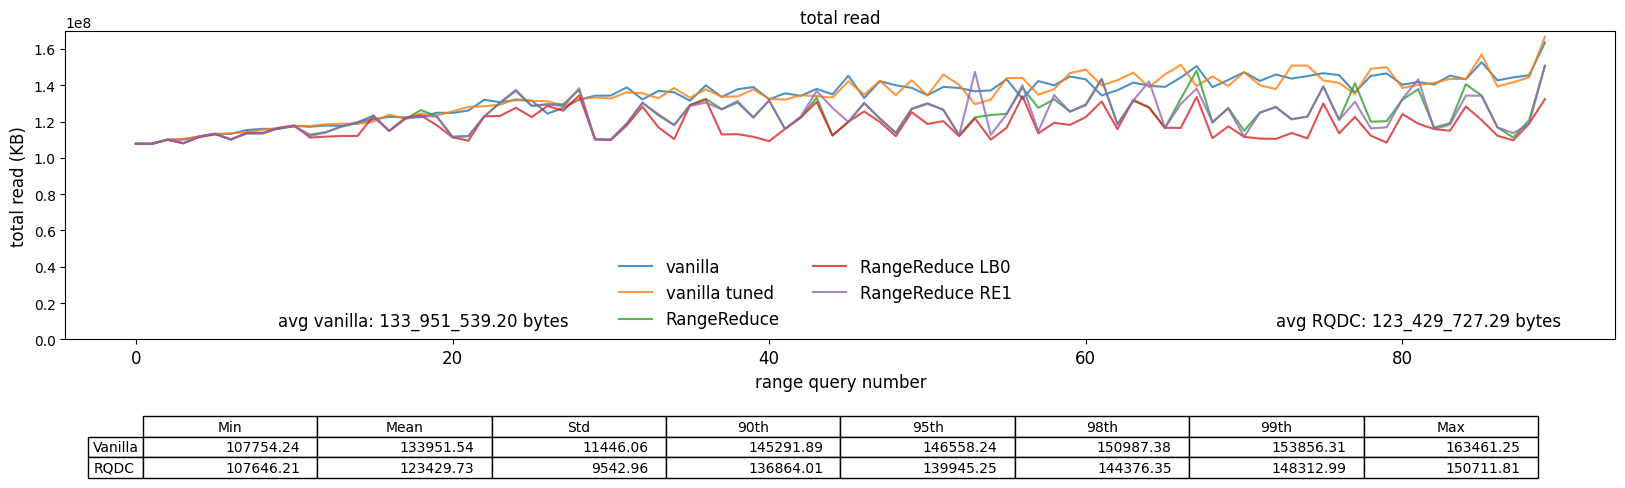

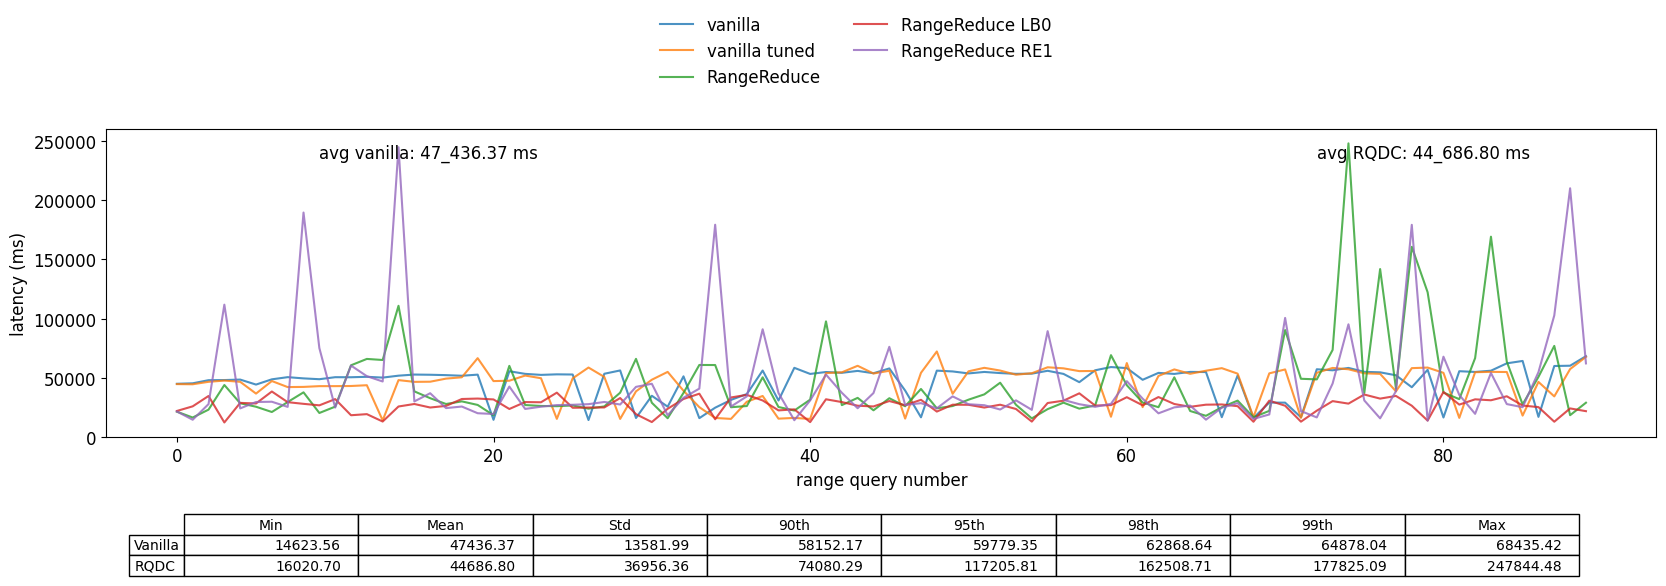

AttributeError: DATA_USEFUL_BYTES_WRITTEN

In [ ]:
random_rq_stats = dict()
random_rq_stats_for_rq = dict()

# for approach in ["VanillaRandomTuned", "RangeReduceRandom", "RangeReduceRandom0", "RangeReduceRandomRE1"]:
lb = 1/SIZE_RATIO
EXPDIRNAME = f"{PROJECT_DIR}/.vstats/experiments-{TAG}-U{UPDATES}-E{ENTRY_SIZE}-B{ENTRIES_PER_PAGE}-S{RANGE_QUERIES}-Y{SELECTIVITY}-T{SIZE_RATIO}"
vandirpath = os.path.join(EXPDIRNAME, "VanillaRandom")
vantuneddirpath = os.path.join(EXPDIRNAME, "VanillaRandomTuned")
rqdcdirpath = os.path.join(EXPDIRNAME, "RangeReduceRandom")
rqdclb0dirpath = os.path.join(EXPDIRNAME, "RangeReduceRandom0")
rqdclre1dirpath = os.path.join(EXPDIRNAME, "RangeReduceRandomRE1")

filesize = ENTRY_SIZE * ENTRIES_PER_PAGE * NUM_PAGE_PER_FILE

van = EpochStats(vandirpath, NUMEPOCHS, filesize)
vantuned = EpochStats(vantuneddirpath, NUMEPOCHS, filesize)
rqdc = EpochStats(rqdcdirpath, NUMEPOCHS, filesize)
rqdclb0 = EpochStats(rqdclb0dirpath, NUMEPOCHS, filesize)
rqdcre1 = EpochStats(rqdclre1dirpath, NUMEPOCHS, filesize)

random_rq_stats[SELECTIVITY] = SelectivityVsMetric(
    Vanilla=van.get_plotstats()[0],
    RangeReduce=rqdc.get_plotstats()[0],
)
random_rq_stats_for_rq[SELECTIVITY] = SelectivityVsRangeQueryMetric(
    Vanilla=van.get_rangequerystats(),
    RangeReduce=rqdc.get_rangequerystats(),
)

plot_exp = PlotRangeQueryStats(van.get_rangequerystats(), vantuned.get_rangequerystats(), rqdc.get_rangequerystats(), rqdclb0.get_rangequerystats(), rqdcre1.get_rangequerystats())
plot_exp.bytes_read_for_each_range_query()
plot_exp.latency_for_each_range_query()
# plot_exp.bytes_written_for_each_range_query()
plot_exp.cummulative_latency_for_range_queries()

metric_exp = PlotEpochStats(van.get_plotstats(), vantuned.get_plotstats(), rqdc.get_plotstats(), rqdclb0.get_plotstats(), rqdcre1.get_plotstats())
metric_exp.plot_total_bytes_written()
metric_exp.plot_database_size()
metric_exp.plot_compaction_debt()
metric_exp.plot_space_amplification()
metric_exp.plot_compaction_read()